In [26]:
# 1 데이터셋 불러오기
import pandas as pd
df = pd.read_csv("netflix_reviews.csv")  # 파일 불러오기

In [27]:
# 2 데이터 전처리
# 결측치 처리
df[df['userName'].isnull()]   # userName 열의 결측치 확인하기
df['userName'] = df['userName'].fillna('anonymous')   # userName 열의 결측치를 anonymous로 채우기

print(df['score'].min())   # score 최솟값 확인하기
print(df['score'].max())   # score 최댓값 확인하기

df[df['content'].isnull()]   # content 열의 결측치 확인하기
# content 열에 결측치가 있는 경우 score에 따라 내용을 채우는 함수 생성하기
def content_filled(row):
    if pd.isnull(row['content']):
        if row['score'] == 5:
            return 'I love it.'
        elif row['score'] == 4:
            return 'I like it.'
        elif row['score'] == 3:
            return 'So-so.'
        elif row['score'] == 2:
            return 'Not good.'
        elif row['score'] == 1:
            return 'Bad.'
    else:
        return row['content']

# content 열의 결측치 처리하기
df['content'] = df.apply(content_filled, axis=1)

df[df['reviewCreatedVersion'].isnull()]   # 결측치 확인하기
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].ffill()   # ffill() : 결측값을 바로 위 값과 동일하게 변경한다.

df[df['appVersion'].isnull()]   # appVersion 열의 결측치 확인하기
df['appVersion'] = df['appVersion'].ffill()   # ffill로 결측치 채우기

df.isnull().sum()

1
5


reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

In [28]:
# 중복값 확인
df[df.duplicated()]    # 중복값 확인하기
df = df.drop_duplicates(keep='first')    # 중복값 제거하기
df.duplicated().sum()    # 중복값이 잘 제거됐는지 확인하기

0

In [29]:

df['content']
content = df['content']
socre = df['score']

<Axes: xlabel='Samples', ylabel='Counts'>

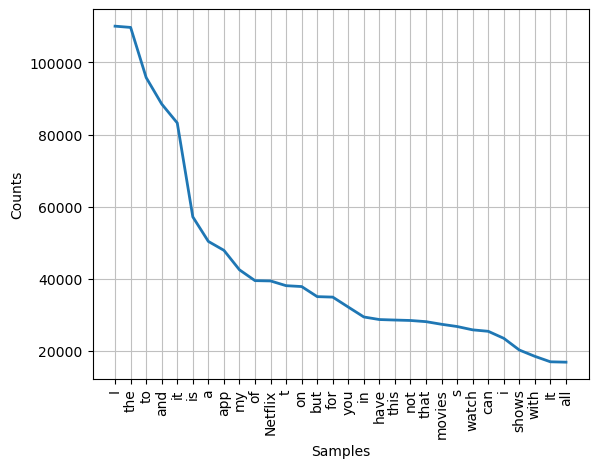

In [30]:
# 데이터 개요 파악
from nltk import Text 
# Text 클래스 선언: 통계 기능 사용 가능
from nltk.tokenize import RegexpTokenizer
# 정규표현식 조건을 적용한 뒤 토큰화

retokenize = RegexpTokenizer(r"[\w]+") # 문자만 출력
content_1st_lot = ' '.join(content)
lot_1 = Text(retokenize.tokenize(content_1st_lot))
lot_1.plot(30)

In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/t2023-m0072/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/t2023-m0072/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/t2023-m0072/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/t2023-m0072/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/t2023-m0072/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is a

True

In [32]:

stop_words = set(stopwords.words('english'))
additional_stopwords = {'app', 'netflix', 'show', 'time', 'series', 'phone', 'movie', 'tv', 'would', 'watch'}
stop_words = stop_words.union(additional_stopwords)
stop_words.discard('not')
# not 이 빠지면 의미가 달리지는 경우가 있어 불용어에서 제외

In [33]:
# 표제어 추출
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemma_v(sentence): # 동사
    return [lemmatizer.lemmatize(word, 'v') for word in sentence] 

def lemma_n(sentence): # 명사
    return [lemmatizer.lemmatize(word, 'n') for word in sentence]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/t2023-m0072/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# 불필요한 품사 제거
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
def TagFitter(sentense):
  tokens = pos_tag(word_tokenize(sentense))
  tags = [t[0] for t in tokens if t[1] != "NNP" and t[1] != "NNPS" and t[1] != "PRP" and t[1] != "DT"]
  # 고유명사, 고유명사 복수형, 인칭 대명사, 관사 제거 
  
  return ' '.join(tags) 
# 문장 형태로 복원

In [35]:
# 't 는 토큰화 하면 의미 없는 t로 출력됨
# not으로 대체
def t_replacer(sentense):
  tokens = word_tokenize(sentense)
  r = []
  for token in tokens:
    if token == 't': 
      r.append('not')
    else: 
      r.append(token)
  return ' '.join(r)

In [36]:
# 철자 검토
from textblob import TextBlob
def WordCorrect(senntense):
  s = TextBlob(senntense)
  s = s.correct()
  s = ''.join(s)
  return s

In [38]:
import re
# 전처리 함수 작성
def preprocessing(sentence):
  if isinstance(sentence, float): return '' # 실수형 데이터 제거, 문자형만
  cleaned = re.sub('[^a-zA-Z]', ' ', sentence) # 문자만
  cleaned = t_replacer(cleaned) # 't 를 not으로 대체
  cleaned = TagFitter(cleaned) # 태그를 기준으로 불필요한 품사 제ㄱ
  cleaned = cleaned.lower() # 소문자화
  cleaned = cleaned.strip() # 띄어쓰기 제외한 공백 제거
  cleaned = cleaned.split() # 문장 분할
  cleaned = lemma_v(cleaned) # 동사 원형화
  cleaned = lemma_n(cleaned) # 명사 원형화
  cleaned = [word for word in cleaned if word not in stop_words] 
  # 불용어 제거
  cleaned = ' '.join(cleaned) # 문장으로 복원
  # cleaned = WordCorrect(cleaned) # 철자 검사
  return cleaned

content[0:5].apply(preprocessing)

0                             not support happen thank
1    get tire guy keep log say not apart household ...
2             one go channel l least month plus l love
3                                       script content
4                                                 good
Name: content, dtype: object

In [39]:
content_2nd_lot = content.apply(preprocessing)
df['content_c'] = content.apply(preprocessing)
content_2nd_lot = ' '.join(content_2nd_lot)

<Axes: xlabel='Samples', ylabel='Counts'>

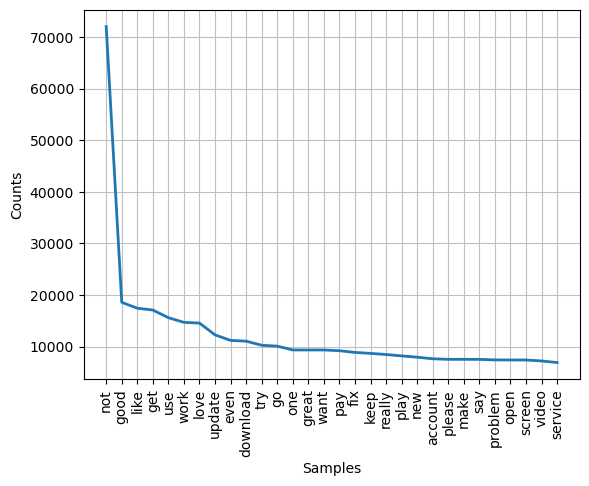

In [40]:
lot_2 = Text(word_tokenize(content_2nd_lot))
lot_2.plot(30)

In [41]:
# 감성 분석
# TextBlob 감성분석 예시
def sentiment(sentense):
 senti = TextBlob(sentense).sentiment
 polar = senti.polarity
 return polar

test_lot = content[0:10].apply(preprocessing)
test_lot.apply(sentiment)

0    0.0
1    0.0
2    0.1
3    0.0
4    0.7
5    0.0
6    0.7
7    0.7
8    0.7
9   -0.7
Name: content, dtype: float64

In [42]:
# 나이브 바예즈 감성분석 예시 - 시간이 오래 걸림
from textblob.sentiments import NaiveBayesAnalyzer
def NB_cl(sentense):
  senti = TextBlob(sentense, analyzer = NaiveBayesAnalyzer())
  score = senti.sentiment.p_pos - senti.sentiment.p_neg
  return score
test_lot.apply(NB_cl)

0    0.282554
1    0.163888
2   -0.227837
3   -0.181470
4    0.008453
5    0.000000
6    0.008453
7    0.207157
8    0.008453
9    0.296066
Name: content, dtype: float64

In [43]:
# NLTK 감성분석 예시
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# NLTK의 감정 사전 다운로드
nltk.download('vader_lexicon')

# 정서 분석기 초기화
sia = SentimentIntensityAnalyzer()

def Senti_Cl_Score(sentense):
      sentiment = sia.polarity_scores(sentense)
      compound_score = sentiment['compound']
      return compound_score

def Senti_Cl_Label(sentense):
      positive_threshold = 0.5
      negative_threshold = -0.5
      compound_score = Senti_Cl_Score(sentense)
      if compound_score >= positive_threshold:
        sentiment_label = "positive"
      elif compound_score <= negative_threshold:
        sentiment_label = "negative"
      else:
        sentiment_label = "neutral"
      return sentiment_label

print(test_lot.apply(Senti_Cl_Score))
print(test_lot.apply(Senti_Cl_Label))

0   -0.5216
1   -0.5943
2    0.6369
3    0.0000
4    0.4404
5    0.0000
6    0.4404
7    0.4404
8    0.4404
9    0.4310
Name: content, dtype: float64
0    negative
1    negative
2    positive
3     neutral
4     neutral
5     neutral
6     neutral
7     neutral
8     neutral
9     neutral
Name: content, dtype: object


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/t2023-m0072/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
# TextBlob 감성분석 방식 선택 - 라벨링 과정을 보여주기 위해 선택
df['sentiment'] = (content.apply(preprocessing)).apply(sentiment)
df['sentiment']

0         0.00
1         0.00
2         0.10
3         0.00
4         0.70
          ... 
117287    0.35
117288    0.45
117289    0.05
117290   -0.50
117291    0.50
Name: sentiment, Length: 117005, dtype: float64

In [45]:
# 라벨링
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
df[['content_c', 'score', 'sentiment_label']]

,content_c,score,sentiment_label
0,not support happen thank,1,neutral
1,get tire guy keep log say not apart household ...,2,neutral
2,one go channel l least month plus l love,5,neutral
3,script content,2,neutral
4,good,3,positive
...,...,...,...
117287,really like many kdramas,5,positive
117288,love always enjoy use,5,positive
117289,sound quality slow,1,neutral
117290,rate expensive bcos see sunday charge hole month,1,negative


In [46]:
pos = df[df['sentiment_label'] == 'positive']
neu = df[df['sentiment_label'] == 'neutral']
neg = df[df['sentiment_label'] == 'negative']

In [47]:
positive = pos['content_c']
neutral = neu['content_c']
negative = neg['content_c']


In [48]:
# 토픽 추출
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora

In [49]:
# 워드클라우드에 not 포함되지 않도록 not 제거
rm_not = ['not']

def remove_not(sentense):
  cleaned = sentense.split()
  cleaned = [word for word in cleaned if word not in rm_not]
  cleaned = ' '.join(cleaned)
  return cleaned

In [50]:
# Latent Dirichlet Allocation
# 잠재 디리클레 할당: 문서집합에서 토픽을 찾아내는 프로세스
from gensim.models import LdaModel
def LDA_model(serise):
  preprocessed = serise.apply(simple_preprocess) # 전처리
  dictionary = corpora.Dictionary(preprocessed) # 코퍼스 생성
  bow = [dictionary.doc2bow(doc) for doc in preprocessed] # Bag of Word ; 단어집 생성
  return LdaModel(bow, num_topics=1, id2word=dictionary, passes=10) # passes : 반복 횟수

pos_model = LDA_model(positive)
neu_model = LDA_model(neutral)
neg_model = LDA_model(negative)

In [51]:
pos_model.show_topic(0)


[('good', 0.034805685),
 ('not', 0.03447796),
 ('love', 0.033089146),
 ('great', 0.017505376),
 ('like', 0.016231498),
 ('best', 0.014522386),
 ('get', 0.010935993),
 ('really', 0.010790495),
 ('use', 0.009692099),
 ('new', 0.007847737)]

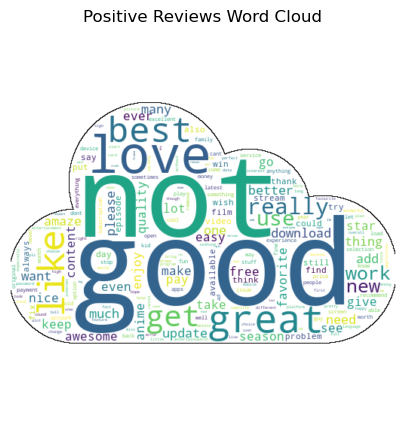

In [52]:
# 추출된 토픽을 이용한 워드클라우드 시각화
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

# 마스크 이미지 불러오기
mask = np.array(Image.open('/Users/t2023-m0072/Desktop/TIL/assignment/cloud.png'))

# 긍정적 리뷰로 워드 클라우드 생성
for idx in range(pos_model.num_topics):
    word_freq = dict(pos_model.show_topic(idx, topn=200))  
    # 인덱스 를 사용하여 단어와 빈도수 가져오기
    # topn : 가져올 단어 수
    
    # 워드클라우드 생성
    wordcloud = WordCloud(
        mask=mask, # 마스크 이미지
        contour_color='black', # 윤곽선 색상
        contour_width=1, # 윤관선 두께
        width=400, # 가로크기
        height=200,  # 세로크기
        background_color='white' # 배경색
    ).generate_from_frequencies(word_freq) # 빈도수

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear') # 보간법 = 선형
    plt.axis('off')  # 축 제거
    plt.title('Positive Reviews Word Cloud')
    plt.show()

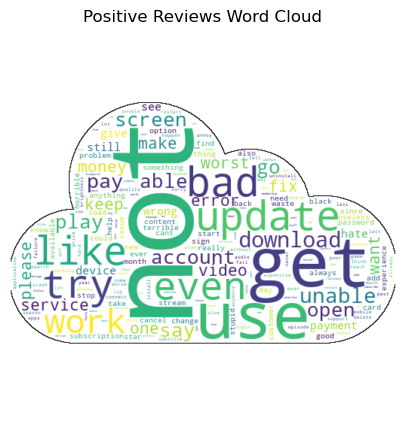

In [53]:
# 마스크 이미지 불러오기
mask = np.array(Image.open('/Users/t2023-m0072/Desktop/TIL/assignment/cloud.png'))



# 부정적 리뷰로 워드 클라우드 생성
for idx in range(neg_model.num_topics):
    word_freq = dict(neg_model.show_topic(idx, topn=200))  
    # 인덱스 를 사용하여 단어와 빈도수 가져오기
    # topn : 가져올 단어 수
    
    # 워드클라우드 생성
    wordcloud = WordCloud(mask=mask,contour_color='black',contour_width=1,width=400, height=200, background_color='white').generate_from_frequencies(word_freq) # 빈도수

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear') # 보간법 = 선형
    plt.axis('off')  # 축 제거
    plt.title('Positive Reviews Word Cloud')
    plt.show()

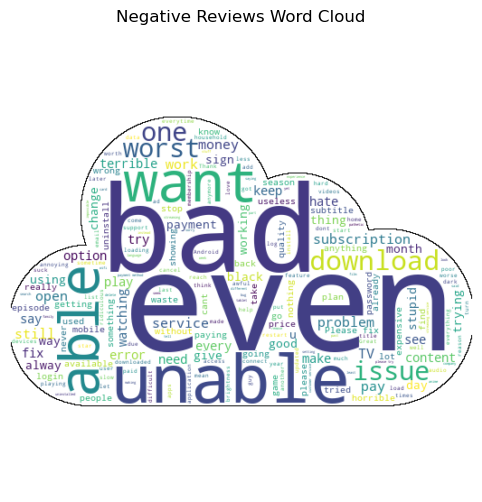

In [54]:
# 필요 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # 이미지 파일 다루기 위한 Pillow 라이브러리의 Image 모듈 가져오기
from wordcloud import WordCloud, STOPWORDS # STOPWORDS : 사용하지 않을 단어들(불용어),  type(STOPWORDS) - set

# 부정적인 리뷰 필터링
negative_reviews = ' '.join(df[df['sentiment_label'] =="negative"]['content'])

# 이미지 가져오기
mask = np.array(Image.open('/Users/t2023-m0072/Desktop/TIL/assignment/cloud.png'))

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['watch','account','netflix','use','im','new','will','shows','video',
                  'screen','update','now','device', 'movie', 'show', 'time', 'app', 'series', 'phone','movies'])
# update() 메서드 : 주로 set 과 dict 형태에 사용됨. 주어진 리스트,튜플,집합 등의 요소를 현재 집합에 추가. 중복 요소 무시



# WordCloud 생성 
wordcloud = WordCloud(
    mask=mask, # 마스크 이미지
    contour_color='black', # 윤곽선 색상
    contour_width=1, # 윤곽선 두께
    width=800, # 가로 크기
    height=400, # 세로 크기
    background_color='white', # 배경색상
    stopwords=stopwords # 불용어
    ).generate(negative_reviews) # generate() : 주어진 텍스트 데이터를 기반으로 워드 클라우드를 만듬

# WordCloud 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear') # 렌더링으로 부드럽게 만들기
plt.axis('off') # 축 숨기기
plt.title('Negative Reviews Word Cloud')
plt.show()

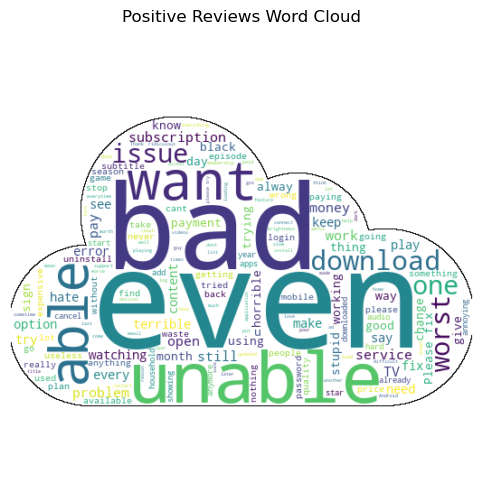

In [56]:
# 필요 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # 이미지 파일 다루기 위한 Pillow 라이브러리의 Image 모듈 가져오기
from wordcloud import WordCloud, STOPWORDS # STOPWORDS : 사용하지 않을 단어들(불용어),  type(STOPWORDS) - set

# 긍정적인 리뷰 필터링
positive_reviews = ' '.join(df[df['sentiment_label'] =="negative"]['content'])

# 이미지 가져오기
mask = np.array(Image.open('/Users/t2023-m0072/Desktop/TIL/assignment/cloud.png'))

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['watch','account','netflix','use','im','new','will','shows','video',
                  'screen','update','now','device', 'movie', 'show', 'time', 'app', 'series', 'phone','movies'])
# update() 메서드 : 주로 set 과 dict 형태에 사용됨. 주어진 리스트,튜플,집합 등의 요소를 현재 집합에 추가. 중복 요소 무시



# WordCloud 생성 
wordcloud = WordCloud(
    mask=mask, # 마스크 이미지
    contour_color='black', # 윤곽선 색상
    contour_width=1, # 윤곽선 두께
    width=800, # 가로 크기
    height=400, # 세로 크기
    background_color='white', # 배경색상
    stopwords=stopwords # 불용어
    ).generate(positive_reviews) # generate() : 주어진 텍스트 데이터를 기반으로 워드 클라우드를 만듬

# WordCloud 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear') # 렌더링으로 부드럽게 만들기
plt.axis('off') # 축 숨기기
plt.title('Positive Reviews Word Cloud')
plt.show()